## Numerical Linear Algebra 
 Author: Vignesh Sathyaseelan (vsathyas@purdue.edu)

In [1]:
import numpy as np
import scipy.linalg  

/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Define martrix 
A = np.array([[2,1,1,0],[4,3,3,1],[8,7,9,5],[6,7,9,8]])

### LU Decomposition:

It factors a matrix into the product of a lower triangular matrix and an upper triangular matrix.

In [3]:
P,L,U = scipy.linalg.lu(A)

print(f'P = \n{P}\n')
print(f'L = \n{L}\n')
print(f'U = \n{U}\n')

P = 
[[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

L = 
[[ 1.          0.          0.          0.        ]
 [ 0.75        1.          0.          0.        ]
 [ 0.5        -0.28571429  1.          0.        ]
 [ 0.25       -0.42857143  0.33333333  1.        ]]

U = 
[[ 8.          7.          9.          5.        ]
 [ 0.          1.75        2.25        4.25      ]
 [ 0.          0.         -0.85714286 -0.28571429]
 [ 0.          0.          0.          0.66666667]]



### Cholesky Decomposition:
It is a decomposition of a Hermitian, positive-definite matrix into the product of a lower triangular matrix and its conjugate transpose

In [4]:
L = np.linalg.cholesky([[6, 3, 4, 8], [3, 6, 5, 1], [4, 5, 10, 7], [8, 1, 7, 25]]) # we need a different positive definite matrix
U = np.transpose(L)

print(f'L = \n{L}\n')
print(f'U = \n{U}\n')

L = 
[[ 2.44948974  0.          0.          0.        ]
 [ 1.22474487  2.12132034  0.          0.        ]
 [ 1.63299316  1.41421356  2.30940108  0.        ]
 [ 3.26598632 -1.41421356  1.58771324  3.13249102]]

U = 
[[ 2.44948974  1.22474487  1.63299316  3.26598632]
 [ 0.          2.12132034  1.41421356 -1.41421356]
 [ 0.          0.          2.30940108  1.58771324]
 [ 0.          0.          0.          3.13249102]]



### Eigen Decomposition:

It is the factorization of a matrix into a canonical form, whereby the matrix is represented in terms of its eigenvalues and eigenvectors

In [5]:
values, vectors = np.linalg.eig(A)

print(f'values = \n{values}\n')
print(f'vectors = \n{vectors}\n')

values = 
[17.76674972  3.46610996  0.51478349  0.25235682]

vectors = 
[[ 0.05217777  0.24958023  0.21781155 -0.39040915]
 [ 0.19290936  0.34361034  0.46497954  0.86229217]
 [ 0.62976442  0.02230173 -0.78847685 -0.17999628]
 [ 0.75063988 -0.9050659   0.33860952 -0.26764575]]



### Singular Value Decomposition: 

The SVD algorithm factorizes a matrix into one matrix with orthogonal columns and one with orthogonal rows (along with a diagonal matrix, which contains the relative importance of each factor).

In [6]:
U, S, V = np.linalg.svd(A, full_matrices=True)

print(f'U = \n{U}\n')
print(f'S = \n{S}\n')
print(f'V = \n{V}\n')

U = 
[[-0.09405951 -0.37837471  0.38179085 -0.83798636]
 [-0.25637107 -0.54175772  0.58921648  0.54184536]
 [-0.67402341 -0.39256817 -0.62495603 -0.0318219 ]
 [-0.68638118  0.63970414  0.3413058  -0.05630135]]

S = 
[21.85847672  3.45065757  0.50598155  0.2096204 ]

V = 
[[-0.49061414 -0.4751477  -0.59962157 -0.41711679]
 [-0.64512366 -0.07931708  0.06392284  0.75725698]
 [ 0.3332812   0.32390239 -0.79728567  0.38515769]
 [-0.48170206  0.81426698 -0.02652189 -0.32284517]]



### Application of SVD: Image Compression

Image matrix 
 [[0.00784314 0.01176471 0.02745098 ... 0.00392157 0.         0.        ]
 [0.00392157 0.01176471 0.02745098 ... 0.         0.00392157 0.00392157]
 [0.00784314 0.02352941 0.02745098 ... 0.00392157 0.00392157 0.00392157]
 ...
 [0.         0.00392157 0.00392157 ... 0.01960784 0.02352941 0.02745098]
 [0.         0.00392157 0.00392157 ... 0.02352941 0.02745098 0.02745098]
 [0.         0.00392157 0.         ... 0.02745098 0.03137255 0.03529412]]


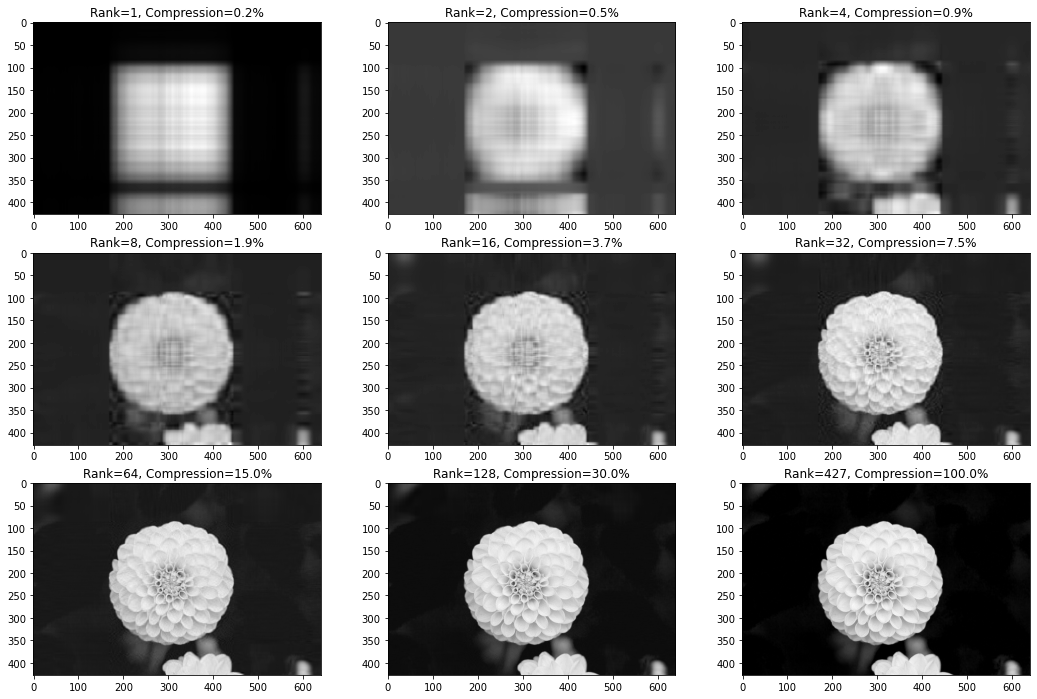

In [7]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt

image = load_sample_image('flower.jpg')[:,:,0]/255.0

print('Image matrix \n', image)


U, s, Vt = np.linalg.svd(image)
Sigma = np.zeros_like(image, dtype=float)
Sigma[:427, :427] = np.diag(s)


max_rank = np.min(image.shape)
rank_arr = [1, 2, 4, 8, 16, 32, 64, 128, max_rank]
fig, axes = plt.subplots(3, 3, figsize=(len(rank_arr)*2, 3*4))
for r, ax in zip(rank_arr, axes.ravel()):
    image_approx = np.matmul(U[:, :r], np.matmul(Sigma[:r,:r], Vt[:r, :]))
    compression = r/max_rank
    ax.imshow(image_approx, cmap='gray')
    ax.set_title('Rank=%d, Compression=%.1f%%' % (r, compression*100))
